In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
train = pd.read_csv('train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
X_train = train.drop('label', axis=1)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train = train[['label']]

print(y_train.head())
y_train = to_categorical(y_train)

   label
0      1
1      0
2      1
3      4
4      0


In [7]:
X_train.shape

(42000, 784)

In [8]:
X_train = X_train.to_numpy()
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_train = X_train.astype('float32') / 255.0

In [9]:
X_train.shape

(42000, 28, 28, 1)

In [12]:
model = None

In [13]:
model = Sequential([
    Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2), strides=2),
    
    Conv2D(64, (3,3), padding='same', activation= 'relu'),
    MaxPooling2D((2, 2), strides=2),
    
    Conv2D(128, (3,3), padding='same', activation= 'relu'),
    MaxPooling2D((2, 2), strides=2),
    
    Conv2D(256, (3,3), padding='same', activation= 'relu'),
    MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.GlobalAveragePooling2D(), #Flatten() or tf.keras.layers.GlobalAveragePooling2D()
    
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [14]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [16]:
history = model.fit(X_train,y_train,epochs=10,batch_size=16, validation_split=0.2)

Epoch 1/10
2100/2100 [==============================] - 118s 55ms/step - loss: 0.2188 - accuracy: 0.9305 - val_loss: 0.0846 - val_accuracy: 0.9750
Epoch 2/10
2100/2100 [==============================] - 121s 58ms/step - loss: 0.0582 - accuracy: 0.9828 - val_loss: 0.0841 - val_accuracy: 0.9745
Epoch 3/10
2100/2100 [==============================] - 119s 57ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0588 - val_accuracy: 0.9869
Epoch 4/10
2100/2100 [==============================] - 117s 56ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0418 - val_accuracy: 0.9892
Epoch 5/10
2100/2100 [==============================] - 130s 62ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0501 - val_accuracy: 0.9863
Epoch 6/10
2100/2100 [==============================] - 107s 51ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0522 - val_accuracy: 0.9863
Epoch 7/10
2100/2100 [==============================] - 102s 48ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0

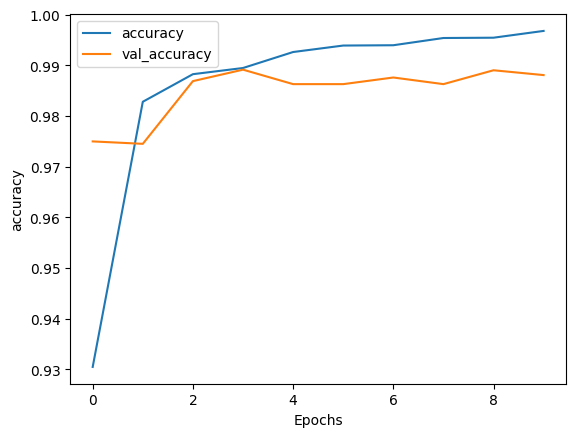

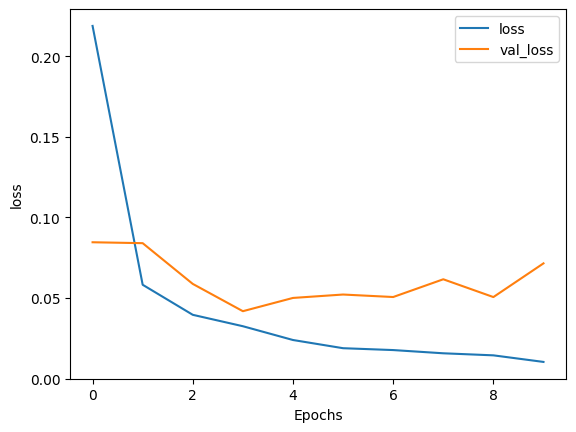

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

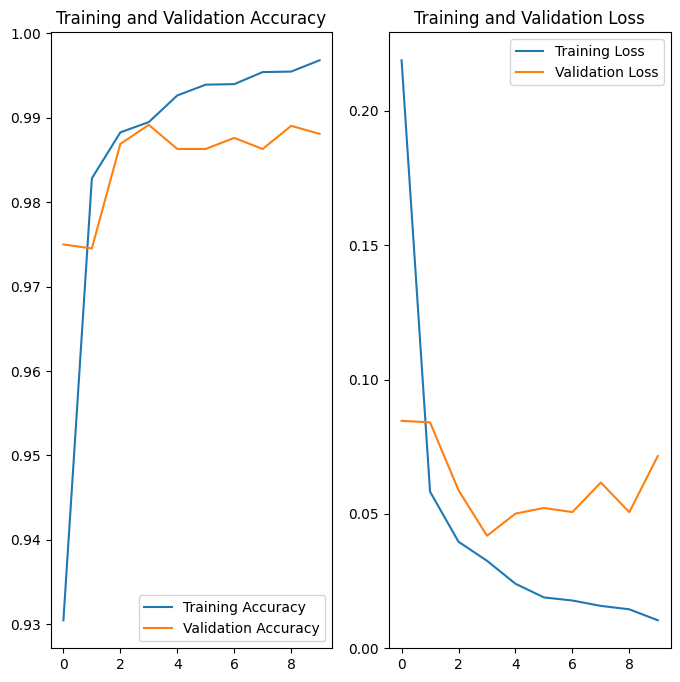

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
X_test = test.to_numpy()
X_test = X_test.reshape((X_test.shape[0],28,28,1))
predictions = model.predict(X_test)

875/875 [==============================] - 13s 14ms/step


In [20]:
digit = np.argmax(predictions, axis=-1)
df_id = pd.DataFrame({'Imageid': range(1,28001)})
df_dp = pd.DataFrame(digit,columns=['Label'])
df_dp = pd.concat([df_id, df_dp], axis=1)
df_dp.head()

,Imageid,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [21]:
df_dp.to_csv('digit8.csv',index=False)